Ryan Reiff

When should we collect Social Security Benefits?

DATA COLLECTION PORTION

The initial part of this code uses webscraping to extract data from 

https://www.ssa.gov/benefits/retirement/planner/1959.html

And 

https://www.ssa.gov/benefits/retirement/planner/1959-delay.html

It then sends these dataframes into Excel, where I was able to clean them, and organize them, and combine them in such as way that will make analysis much easier, and much faster.

In [1]:
import pandas as pd
import numpy as np

X = pd.read_html('https://www.ssa.gov/benefits/retirement/planner/1959.html')
Y = pd.read_html('https://www.ssa.gov/benefits/retirement/planner/1959-delay.html')


This reads the DataFrames to Excel Files

In [2]:
Y[0].to_csv('/Users/RyanReiff/Documents/Backup_Data_2.csv')
X[0].to_csv('/Users/RyanReiff/Documents/Backup_Data.csv')

Now We can read the cleaned dataset back into Python, and perform analysis on it in order to determine at what age one should begin collecting social security benefits.

In [3]:
import pandas as pd
import numpy as np

DataFrame = pd.read_csv('/Users/RyanReiff/Documents/WCF/WCF_Full_Data.csv')
DataFrame

,Begin Collecting at Age,Portion of Check Earned
0,62,0.708
1,62 + 1 month,0.713
2,62 + 2 months,0.717
3,62 + 3 months,0.721
4,62 + 4 months,0.725
...,...,...
92,69 + 8 months,1.227
93,69 + 9 months,1.233
94,69 + 10 months,1.240
95,69 + 11 months,1.247


Assumptions:
    
   The average MALE individual lives to be : 83 years and 5 months old (257 months after 62nd birthday)
    
   Source: https://www.ssa.gov/cgi-bin/longevity.cgi
    
   The 20 year bond yield as of 2/19/21 is : 1.98% paid semi-annually
    
   Source: https://www.treasury.gov/resource-center/data-chart-center/interest-rates/pages/textview.aspx?data=yield
    
   The average benefit collected by individuals in America is : 1,543 dollars per month
    
   Source: https://www.ssa.gov/pubs/EN-05-10024.pdf (reference page 27 of pdf)
    
    
Social Security Benefits are paid the month after they are due, such that one will recieve their July check in August, and thus they can be treated as an annuity. 

We will also assume that the indivudual here is able to collect his last check for the previous month during the month in which he passes away. 

We will also assume that this indivual is not making significant amounts of money in addition to his SSB, and therefore these benefits are not taxable federally, as is according to the government rules, if one individual makes below $25,000 in 'combined income' then this income is not federally taxable. 

   Source: https://www.ssa.gov/benefits/retirement/planner/taxes.html 
    
Also California has no state tax on Social Security Benefits, and thus we will assume no tax rate for this problem, since the individual annual earnings will amount to $18,560

   Source: https://smartasset.com/retirement/california-retirement-taxes#:~:text=While%20California%20exempts%20Social%20Security,sales%20taxes%20in%20the%20U.S.

Lastly, we will assume that this individual is unmarried and has no children, and is turning 62 this year, and thus we are to adivise him on the best course of action. In actuality, the best course of action is extremely case by case, and depends entirely on the goal of the client. For this case we will assume that the goal is to maximize as much money earned in retirement as possible, however that is not always the case, and the approach below can be adapted to various client needs.

PRESENT VALUE ~ What each strategy is worth in today's dollars at the age of 62

Now lets calculate the various Present Values of collecting the average benefit each month, starting at each age up until one is 70 years old, and lives to the average age for a male in the United States at 83.4 years old. The interest rate has been adapted here to 0.243% monthly rate, after converting the 20 year semi-annual treasury note yield referenced above. 

In [4]:
Percent_Benefits = DataFrame['Portion of Check Earned'].values
Age = DataFrame['Begin Collecting at Age'].values.astype('str')
Age[-1] = '70'

Amount = []
P = 1543
r = 0.00243
n = 257

for c, i in enumerate(Percent_Benefits):
    x = (P*i)*((1-(1/((1+r)**(n-c))))/r)
    x = x/((1+r)**c)
    Amount.append(x)

Amount = np.array(Amount)
Age = Age

Converted_Amount = []
for i in Amount:
    x = '${:,.2f}'.format(i)
    Converted_Amount.append(x)
    
Converted_Amount = np.array(Converted_Amount)
Amount = Amount.round(decimals=2)

d = {'Age When We Begin Collecting': Age, 'Present Value at Age 62 of Total Earnings': Amount,
    'Holder Column': Converted_Amount}
Present_Value_Orig = pd.DataFrame(data=d)
Present_Value = Present_Value_Orig[['Age When We Begin Collecting','Present Value at Age 62 of Total Earnings']]
Present_Value

,Age When We Begin Collecting,Present Value at Age 62 of Total Earnings
0,62,208630.00
1,62 + 1 month,209005.89
2,62 + 2 months,209077.46
3,62 + 3 months,209139.43
4,62 + 4 months,209191.83
...,...,...
92,69 + 8 months,205651.92
93,69 + 9 months,205139.45
94,69 + 10 months,204781.05
95,69 + 11 months,204409.16


Which Year yields us the most money?

In [5]:
print("We collect the most money waiting until",
      Present_Value.iloc[Present_Value_Orig['Present Value at Age 62 of Total Earnings'].idxmax()][0],
     "worth a total of", Present_Value_Orig.iloc[Present_Value_Orig['Present Value at Age 62 of Total Earnings'].idxmax()][2],
     "in present value dollars today at age 62")

We collect the most money waiting until 65 + 7 months worth a total of $212,512.37 in present value dollars today at age 62


GRAPH : We can observe the results above graphically, to see what happens if we wait too long to collect social security befenits, assuming we live to be 83 years and 5 months old.

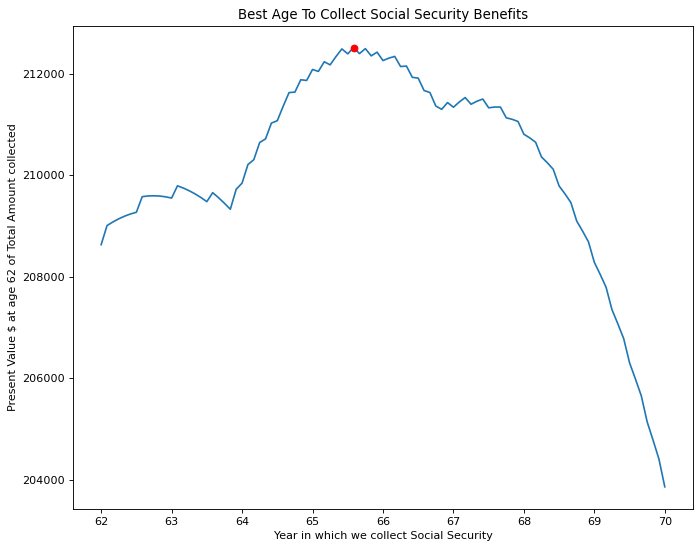

In [6]:
import matplotlib.pyplot as plt

x = np.linspace(62,70,97)
y = Present_Value_Orig['Present Value at Age 62 of Total Earnings'].values

plt.figure(num=None, figsize=(10, 8), dpi=80, facecolor='w', edgecolor='k')
plt.plot(x,y)
plt.xlabel('Year in which we collect Social Security')
plt.ylabel('Present Value $ at age 62 of Total Amount collected')
plt.title('Best Age To Collect Social Security Benefits')
plt.plot(x[y.argmax()],max(y), 'ro')
plt.show()

Now lets look at which year is the best to collect Social Security Benefits based on how long we expect to live. The results above assume that we live to the average age of 83.4 years old, however with family histories, lifestyle choices, and pre-existing conditions, this assumption might not be correct for everyone.

CUSTOMIZED CHART

In [7]:
Percent_Benefits = DataFrame['Portion of Check Earned'].values
Age = DataFrame['Begin Collecting at Age'].values.astype('str')
Age[-1] = '70'

Store = []
Age_Death = []
Start_At = []
P = 1543
r = 0.00243

for j in range(1,400):
    Collected = []
    n = j
    Age_Death.append(62+float("{:.2f}".format(j/12)))
    for c, i in enumerate(Percent_Benefits):
        x = (P*i)*((1-(1/((1+r)**(n-c))))/r)
        x = x/((1+r)**c)
        Collected.append(x)
    Store.append(max(Collected))
    Year = Collected.index(max(Collected))
    Start_At.append(Age[Year])
    
Converted_Store = []
for i in Store:
    x = '${:,.2f}'.format(i)
    Converted_Store.append(x)
    
Converted_Store = np.array(Converted_Store)
Start_At = np.array(Start_At)
Age_Death = np.array(Age_Death)
Store = np.array(Store)
Store = Store.round(decimals=2)

d = {'Life Expectancy': Age_Death, 'Age When We Should Begin Collecting': Start_At,
     'Present Value at age 62 of Total Earnings': Store}
Full_DF = pd.DataFrame(data=d)
Full_DF

,Life Expectancy,Age When We Should Begin Collecting,Present Value at age 62 of Total Earnings
0,62.08,62,1089.80
1,62.17,62,2176.95
2,62.25,62,3261.47
3,62.33,62,4343.36
4,62.42,62,5422.63
...,...,...,...
394,94.92,70,325220.97
395,95.00,70,325960.43
396,95.08,70,326698.09
397,95.17,70,327433.96


Write the Results to an Excel File

In [8]:
Full_DF.to_csv('/Users/RyanReiff/Documents/WCF/SSB_DF_PV.csv')

Now Lets look at some cutoff ages, in other words, lets condense the table into only unique ages, to make it more viewable

In [9]:
Full_DF

Var1 = Full_DF['Age When We Should Begin Collecting']
Var2 = Full_DF['Life Expectancy']

col_1 = []
col_2 = []

for i in range(0,len(Var1)-1):
    if Var1[i+1] != Var1[i]:
        col_1.append(Var1[i])
        col_2.append(Var2[i])
col_1.append(Var1[i+1])
        
Total_Keeper = []
for i in range(0,len(col_2)):
    D = []
    if i == 0:
        D.append('Age <=')
        D.append(col_2[i])
    if i > 0 and i < len(col_2):
        D.append(col_2[i-1])
        D.append('<'.format())
        D.append('Age'.format())
        D.append('<='.format())
        D.append(col_2[i])

    Total_Keeper.append(D)
Total_Keeper.append(['Age','>',col_2[-1]])

Inequalities = []
for i in Total_Keeper:
    Inequalities.append(' '.join(str(x) for x in i))
Inequalities = np.array(Inequalities)


d = {'Life Expectancy Range': Inequalities, 'Start Collecting At Age': col_1}
Inequalities_DF = pd.DataFrame(data=d)
Inequalities_DF

,Life Expectancy Range,Start Collecting At Age
0,Age <= 76.5,62
1,76.5 < Age <= 81.17,62 + 1 month
2,81.17 < Age <= 81.58,62 + 7 months
3,81.58 < Age <= 81.92,65
4,81.92 < Age <= 83.17,65 + 5 months
5,83.17 < Age <= 83.58,65 + 7 months
6,83.58 < Age <= 83.92,65 + 9 months
7,83.92 < Age <= 84.33,66 + 2 months
8,84.33 < Age <= 84.83,67 + 8 months
9,84.83 < Age <= 85.5,67 + 11 months


In [10]:
Inequalities_DF.to_csv('/Users/RyanReiff/Documents/WCF/SSB_DF_PV_T.csv')

FUTURE VALUE ~ What each strategy is worth at the time we stop collecting our social security benefits

*Refer to the Assumptions portion above, as we will be following these same assumptions for this portion* 

In [19]:
Percent_Benefits = DataFrame['Portion of Check Earned'].values
Age = DataFrame['Begin Collecting at Age'].values.astype('str')
Age[-1] = '70'

Amount = []
P = 1543
r = 0.00243
n = 257

for c, i in enumerate(Percent_Benefits):
    x = (P*i)*((((1+r)**(n-c))-1)/r)
    Amount.append(x)

Amount = np.array(Amount)
Age = Age

Converted_Amount = []
for i in Amount:
    x = '${:,.2f}'.format(i)
    Converted_Amount.append(x)
    
Converted_Amount = np.array(Converted_Amount)

d = {'Age When We Begin Collecting': Age, 'Total Amount Earned at 83 Years and 5 Months': Amount,
    'Holder Column': Converted_Amount}
Future_Value_Orig = pd.DataFrame(data=d)
Future_Value = Future_Value_Orig[['Age When We Begin Collecting','Total Amount Earned at 83 Years and 5 Months']]
Future_Value

,Age When We Begin Collecting,Total Amount Earned at 83 Years and 5 Months
0,62,389286.204367
1,62 + 1 month,389987.571926
2,62 + 2 months,390121.115183
3,62 + 3 months,390236.744788
4,62 + 4 months,390334.531881
...,...,...
92,69 + 8 months,383729.347830
93,69 + 9 months,382773.117284
94,69 + 10 months,382104.367063
95,69 + 11 months,381410.459428


In [20]:
print("We collect the most money waiting until",
      Future_Value.iloc[Future_Value_Orig['Total Amount Earned at 83 Years and 5 Months'].idxmax()][0],
     "which is worth a total of", Future_Value_Orig.iloc[Future_Value_Orig['Total Amount Earned at 83 Years and 5 Months'].idxmax()][2],
     "by the time we reach 83 years and 5 months")

We collect the most money waiting until 65 + 7 months which is worth a total of $396,530.38 by the time we reach 83 years and 5 months


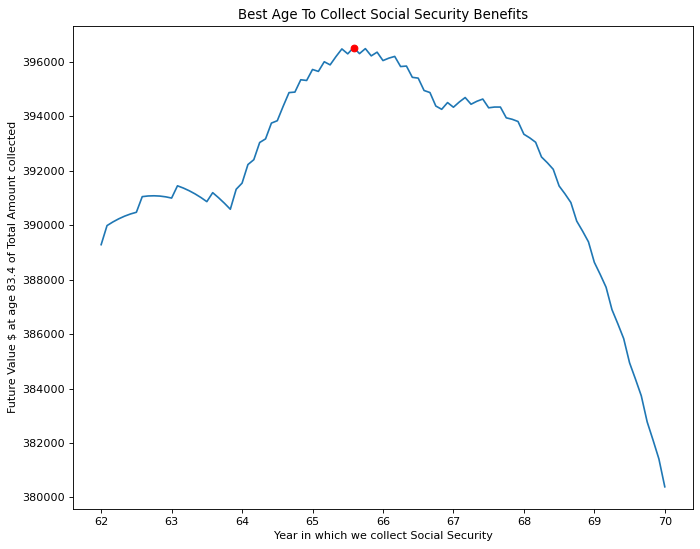

In [13]:
x = np.linspace(62,70,97)
y = Future_Value_Orig['Total Amount Earned at 83 Years and 5 Months'].values

plt.figure(num=None, figsize=(10, 8), dpi=80, facecolor='w', edgecolor='k')
plt.plot(x,y)
plt.xlabel('Year in which we collect Social Security')
plt.ylabel('Future Value $ at age 83.4 of Total Amount collected')
plt.title('Best Age To Collect Social Security Benefits')
plt.plot(x[y.argmax()],max(y), 'ro')
plt.show()

In [14]:
Percent_Benefits = DataFrame['Portion of Check Earned'].values
Age = DataFrame['Begin Collecting at Age'].values.astype('str')
Age[-1] = '70'

Store = []
Age_Death = []
Start_At = []
P = 1543
r = 0.00243

for j in range(1,400):
    Collected = []
    n = j
    Age_Death.append(62+float("{:.2f}".format(j/12)))
    for c, i in enumerate(Percent_Benefits):
        x = (P*i)*((((1+r)**(n-c))-1)/r)
        Collected.append(x)
    Store.append(max(Collected))
    Year = Collected.index(max(Collected))
    Start_At.append(Age[Year])
    
Converted_Store = []
for i in Store:
    x = '${:,.2f}'.format(i)
    Converted_Store.append(x)
    
Converted_Store = np.array(Converted_Store)
Start_At = np.array(Start_At)
Age_Death = np.array(Age_Death)
Store = np.array(Store)
Store = Store.round(decimals=2)

d = {'Life Expectancy': Age_Death, 'Age When We Should Begin Collecting': Start_At,
     'Value of Total Earnings At End of Life': Store}
Full_DF_2 = pd.DataFrame(data=d)
Full_DF_2

,Life Expectancy,Age When We Should Begin Collecting,Value of Total Earnings At End of Life
0,62.08,62,1092.44
1,62.17,62,2187.54
2,62.25,62,3285.30
3,62.33,62,4385.73
4,62.42,62,5488.83
...,...,...,...
394,94.92,70,848262.84
395,95.00,70,852257.50
396,95.08,70,856261.86
397,95.17,70,860275.96


In [15]:
Full_DF_2.to_csv('/Users/RyanReiff/Documents/WCF/SSB_DF_FV.csv')

In [16]:
Full_DF_2

Var1 = Full_DF_2['Age When We Should Begin Collecting']
Var2 = Full_DF_2['Life Expectancy']

col_1 = []
col_2 = []

for i in range(0,len(Var1)-1):
    if Var1[i+1] != Var1[i]:
        col_1.append(Var1[i])
        col_2.append(Var2[i])
col_1.append(Var1[i+1])
        
Total_Keeper = []
for i in range(0,len(col_2)):
    D = []
    if i == 0:
        D.append('Age <=')
        D.append(col_2[i])
    if i > 0 and i < len(col_2):
        D.append(col_2[i-1])
        D.append('<'.format())
        D.append('Age'.format())
        D.append('<='.format())
        D.append(col_2[i])

    Total_Keeper.append(D)
Total_Keeper.append(['Age','>',col_2[-1]])

Inequalities = []
for i in Total_Keeper:
    Inequalities.append(' '.join(str(x) for x in i))
Inequalities = np.array(Inequalities)


d = {'Life Expectancy Range': Inequalities, 'Start Collecting At Age': col_1}
Inequalities_DF_2 = pd.DataFrame(data=d)
Inequalities_DF_2

,Life Expectancy Range,Start Collecting At Age
0,Age <= 76.5,62
1,76.5 < Age <= 81.17,62 + 1 month
2,81.17 < Age <= 81.58,62 + 7 months
3,81.58 < Age <= 81.92,65
4,81.92 < Age <= 83.17,65 + 5 months
5,83.17 < Age <= 83.58,65 + 7 months
6,83.58 < Age <= 83.92,65 + 9 months
7,83.92 < Age <= 84.33,66 + 2 months
8,84.33 < Age <= 84.83,67 + 8 months
9,84.83 < Age <= 85.5,67 + 11 months


In [17]:
Inequalities_DF_2.to_csv('/Users/RyanReiff/Documents/WCF/SSB_DF_FV_T.csv')

GUI User Access Portion

In [18]:
from tkinter import *

def click():
    Percent_Benefits = DataFrame['Portion of Check Earned'].values
    Age = DataFrame['Begin Collecting at Age'].values.astype('str')

    Amount = []
    r = float(textentry1.get())
    P = float(textentry2.get())
    n = (round(float(textentry3.get())*12) - 744)

    for c, i in enumerate(Percent_Benefits):
        x = (P*i)*((((1+r)**(n-c))-1)/r)
        Amount.append(x)

    Amount = np.array(Amount)
    Amount = Amount.round(decimals=2)
    Age[-1] = '70'

    d = {'Age When We Begin Collecting': Age, 'Holder Column': Amount}
    Future_Value_Orig = pd.DataFrame(data=d)
    
    Future_Value = Future_Value_Orig[['Age When We Begin Collecting','Holder Column']]
    One = Future_Value.iloc[Future_Value_Orig['Holder Column'].idxmax()][0]
    #Two = str(Future_Value.iloc[Future_Value_Orig['Holder Column'].idxmax()][1])
    
    if n <=0 :
        Two = '0'
    else:
        Two = str(Future_Value.iloc[Future_Value_Orig['Holder Column'].idxmax()][1])                
    
    Combo = "You should retire at " + One + \
    " Your total earnings will be " + Two + \
    " dollars"
    
    Output.delete(0.0, END)
    Output.insert(END, str(Combo))

window = Tk()
window.title("Social Security Calculator")
window.configure(background = 'white')

Label(window,text = "Enter Information Below", bg = 'white',fg = 'black').grid(row=1,column=4)

Label(window,text = "Monthly Interest Rate", bg = 'white',fg = 'black').grid(row=2,column=3)
textentry1 = Entry(window, width=10, bg='white', borderwidth = 3, relief ='sunken', background = 'light grey')
textentry1.grid(row = 3, column=3)

Label(window,text = "Monthly Check Amount", bg = 'white',fg = 'black').grid(row=2,column=4)
textentry2 = Entry(window, width=10, bg='white', borderwidth = 3, relief ='sunken', background = 'light grey')
textentry2.grid(row = 3, column=4)

Label(window,text = "Life Expectancy", bg = 'white',fg = 'black').grid(row=2,column=5)
textentry3 = Entry(window, width=10, bg='white', borderwidth = 3, relief ='sunken', background = 'light grey')
textentry3.grid(row = 3, column=5)


Button(window, text = 'Submit', width = 6, command = click).grid(row = 4, column=4)


Label(window,text = "Predicted Age To Begin Collecting", bg = 'white',fg = 'black').grid(row=8,column=4)
Output = Text(window, width=20, height = 6, wrap = WORD, background = 'white')
Output.grid(row = 9, column = 4)

window.mainloop()
